# Case study on Pre-processing

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the dataset into python environment

In [206]:
data=pd.read_csv(r"C:\Users\USER\Downloads\titanic_dataset.csv")

In [207]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [169]:
data.set_index("PassengerId").head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

##### (i) Columns

In [170]:
print("Columns of the given data are :\n ")
for i in data.columns:
    print(i)

Columns of the given data are :
 
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


##### (ii) Dimension 

In [171]:
i,j=data.shape
print("Number of Rows:",i)
print("Number of Columns:",j)

Number of Rows: 891
Number of Columns: 12


##### (iii)Basic information 

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### (iv)Statistical details

In [173]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Fill in all the missing values present in all the columns in the dataset

In [174]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [175]:
for i in ['Age']:
    data[i] = data[i].fillna(data[i].median())
data=data.drop("Cabin",axis=1)

In [176]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [177]:
num = data['Embarked'].mode()[0]
data['Embarked'].fillna(num, inplace=True)

In [178]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset.

##### (i)Handling Outiers in Age

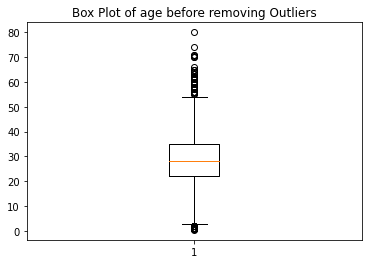

In [179]:
plt.boxplot(data["Age"])
plt.title("Box Plot of age before removing Outliers")
plt.show()

In [180]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(' Q1 =',Q1,'\n','Q2 =',Q2,'\n','Q3 =',Q3)
iqr=Q3-Q1
low_limit = Q1-1.5*iqr
up_limit = Q3+1.5*iqr
outlier1 = []
for i in data['Age']:
    if((i>up_limit) or (i<low_limit)):
        outlier1.append(i)
print(' Inter Quartile Range =',iqr,'\n','Lower Limit =',low_limit,'\n','Upper  Limit =',up_limit)
print("Outlier is : ",outlier1)
data.loc[data['Age']<low_limit].index
data.loc[data['Age']>up_limit].index

 Q1 = 22.0 
 Q2 = 28.0 
 Q3 = 35.0
 Inter Quartile Range = 13.0 
 Lower Limit = 2.5 
 Upper  Limit = 54.5
Outlier is :  [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [181]:
data.drop([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],inplace = True)
data
print("Outliers of Age are Removed")

Outliers of Age are Removed


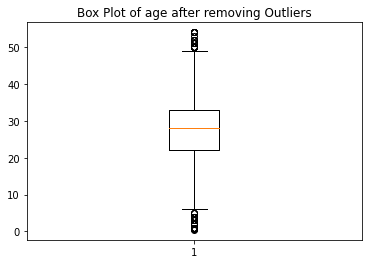

In [182]:
plt.boxplot(data["Age"])
plt.title("Box Plot of age after removing Outliers")
plt.show()

##### (ii)Handling Outiers in Fare

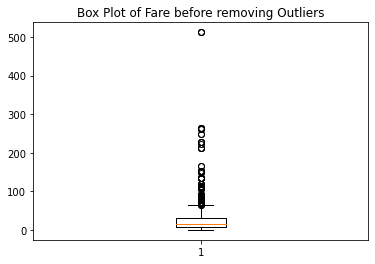

In [183]:
plt.boxplot(data["Fare"])
plt.title("Box Plot of Fare before removing Outliers")
plt.show()

In [184]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(' Q1 =',Q1,'\n','Q2 =',Q2,'\n','Q3 =',Q3)
iqr=Q3-Q1
low_limit = Q1-1.5*iqr
up_limit = Q3+1.5*iqr
outlier = []
for i in data['Fare']:
    if((i>up_limit) or (i<low_limit)):
        outlier.append(i)
print(' Inter Quartile Range =',iqr,'\n','Lower Limit =',low_limit,'\n','Upper  Limit =',up_limit)
print("Outlier is : ",outlier)

 Q1 = 7.8958 
 Q2 = 14.1083 
 Q3 = 30.5
 Inter Quartile Range = 22.6042 
 Lower Limit = -26.0105 
 Upper  Limit = 64.4063
Outlier is :  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55]


In [185]:
out=[]
for i in (data.loc[data['Fare']>up_limit].index):
    out.append(i)


In [186]:
data.drop(out,inplace=True)

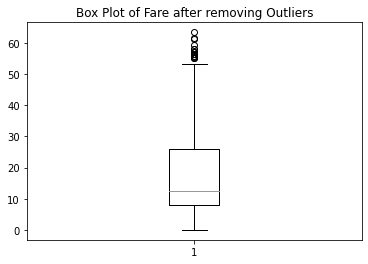

In [187]:
plt.boxplot(data["Fare"])
plt.title("Box Plot of Fare after removing Outliers")
plt.show()

##### (iii)Handling Outiers in SibSp

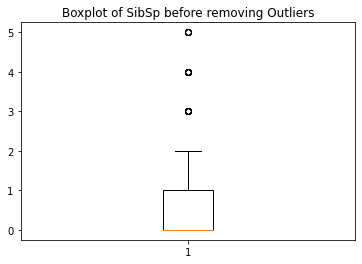

In [188]:
plt.boxplot(data['SibSp'])
plt.title("Boxplot of SibSp before removing Outliers")
plt.show()

In [189]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(' Q1 =',Q1,'\n','Q2 =',Q2,'\n','Q3 =',Q3)
iqr=Q3-Q1
low_limit = Q1-1.5*iqr
up_limit = Q3+1.5*iqr
outlier2 = []
for i in data['SibSp']:
    if((i>up_limit) or (i<low_limit)):
        outlier2.append(i)
print(' Inter Quartile Range =',iqr,'\n','Lower Limit =',low_limit,'\n','Upper  Limit =',up_limit)
print("Outlier is : ",outlier2)

 Q1 = 0.0 
 Q2 = 0.0 
 Q3 = 1.0
 Inter Quartile Range = 1.0 
 Lower Limit = -1.5 
 Upper  Limit = 2.5
Outlier is :  [3, 4, 3, 4, 5, 3, 4, 5, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 4, 4]


In [190]:
out2=[]
for i in (data.loc[data['SibSp']>up_limit].index):
    out2.append(i)

In [191]:
data.drop(out2,inplace=True)

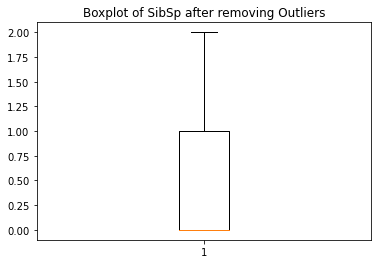

In [192]:
plt.boxplot(data['SibSp'])
plt.title("Boxplot of SibSp after removing Outliers")
plt.show()

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [229]:
y=data2["Survived"]
x=data2.drop("Survived",axis=1)


In [237]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [236]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,451.211348,2.492199,28.116667,0.283688,0.292199,16.779822
std,258.894875,0.721235,10.243244,0.512988,0.762963,13.139205
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,2.000000,22.000000,0.000000,0.000000,7.879200
50%,451.000000,3.000000,28.000000,0.000000,0.000000,11.133300
75%,675.000000,3.000000,33.000000,1.000000,0.000000,24.000000
max,891.000000,3.000000,54.000000,2.000000,6.000000,63.358300
